## out produce

In [49]:
import math
import numpy as np
from scipy import special
import cmath
import sawcom7 as sc
import random

pI = 3600E-9 #The period of IDT, normally is one wavelength
h = 0.08*pI #The thickness of IDT, Al or Al-Cu1%
W1 = 20*pI # Width of IDT (acoustic aperture), in m
m_ratio = 0.6 #The metallization ratio
epsilon_0 = 8.8541878128e-12 #The permittivity of vacuum

npiezo_1 = 50.3562796837374
eta = (0.182+0.349*(2*h/pI))*math.sqrt(2*np.pi/pI)
e = (0.0388+0.618*(2*h/pI))*math.sqrt(2*np.pi/pI)
alpha = 0.05
c = 1 + (0.0678+1.27*(2*h/pI))**2
k2 = 0.0655 + 0.206*(2*h/pI)
vb = 4226.54

npiezo_1_num = [i for i in np.linspace(npiezo_1*0.8,npiezo_1*1.2,10000)]
eta_num = [i for i in np.linspace(eta*0.8,eta*1.2,10000)]
e_num = [i for i in np.linspace(e*0.8,e*1.2,10000)]
alpha_num = [i for i in np.linspace(alpha*0.8,alpha*1.2,10000)]
c_num = [i for i in np.linspace(c*0.01,c*2.0,10000)]
k2_num = [i for i in np.linspace(k2*0.01,k2*4.0,10000)]
vb_num = [i for i in np.linspace(vb*0.8,vb*1.2,10000)]

x = np.zeros((20000,7))
for i in range(0,20000):
    random.seed()
    npi = random.sample(npiezo_1_num,1)[0]
    et = random.sample(eta_num,1)[0]
    e = random.sample(e_num,1)[0]
    al = random.sample(alpha_num,1)[0]
    c = random.sample(c_num,1)[0]
    k = random.sample(k2_num,1)[0]
    v = random.sample(vb_num,1)[0]
    x[i,:]=[npi,et,e,al,c,k,v]
    
x_max = x.max(axis=0).reshape((1,7))
x_min = x.min(axis=0).reshape((1,7))
file = 'D:/data/7p/out/' +'MP60' + '.csv'
with open(file,'w',newline='') as f:
    np.savetxt(f,x,delimiter=',',newline='\n')
file = file + 'maxmin.csv'
with open(file, 'w', newline='') as f:
    np.savetxt(f, x_max, delimiter=',',newline='\n')
    np.savetxt(f, x_min, delimiter=',',newline='\n')


In [50]:
import math
import numpy as np
from scipy import special
import cmath
import sawcom7 as sc

pI = 3600E-9 #The period of IDT, normally is one wavelength
h = 0.08*pI #The thickness of IDT, Al or Al-Cu1%
W1 = 20*pI # Width of IDT (acoustic aperture), in m
m_ratio = 0.6 #The metallization ratio
epsilon_0 = 8.8541878128e-12 #The permittivity of vacuum

npiezo_1 = 50.3562796837374
eta = (0.182+0.349*(2*h/pI))*math.sqrt(2*np.pi/pI)
e = (0.0388+0.618*(2*h/pI))*math.sqrt(2*np.pi/pI)
alpha = 0.05
c = 1 + (0.0678+1.27*(2*h/pI))**2
k2 = 0.0655 + 0.206*(2*h/pI)
vb = 4226.54

eta_b = (eta+2*abs(e))/2
epsilon = npiezo_1*epsilon_0

x1 = np.cos(np.pi*m_ratio )
m1 = math.sqrt((1-x1)/2) 
km1 = special.ellipk(m1, out=None)
p1 = 2*km1/np.pi
x2 = -np.cos(np.pi*m_ratio )
m2 = math.sqrt((1-x2)/2) 
km2 = special.ellipk(m2, out=None)
p2 = 2*km2/np.pi
p_factor = p1/p2




freq = np.linspace(0.5E9, 1.5E9, 501)
# freq_mhz = freq/1e6

# eta = (0.182+0.349*(2*h/pI))*math.sqrt(2*np.pi/pI)
# e = (0.0388+0.618*(2*h/pI))*math.sqrt(2*np.pi/pI)
# eta_b = (eta+2*abs(e))/2
# alpha = 10**(-3.39+7.39*(2*h/pI))
# c = 1 + (0.0678+1.27*(2*h/pI))**2
# k2 = 0.0655 + 0.206*(2*h/pI)
# vb = 4226.54

delta_v = - (eta**2)/2
k = abs(e)*(eta+abs(e)/2)
kb = -(abs(e)**2)*eta/(eta+2*abs(e))
delta_b = -((eta**2)-2*((abs(e)**2)))/4
omega = freq*2*np.pi
delta = omega/vb - 2*np.pi/pI - 1j*alpha

# epsilon = npiezo_1*epsilon_0
v_delta = []
for i in range(0,len(delta)):
    v_delta_0 = eta_b/((cmath.sqrt(delta_b-delta[i]))+ eta_b)# wave velocity in m/s
    v_delta.append(v_delta_0)
v_delta = np.array(v_delta)
omega = freq*2*np.pi
C = (W1*epsilon*p_factor)/pI ##To check
xi = []
for i in range(0,len(omega)):
    xi_0 = c*cmath.sqrt((omega[i]*C*k2)/(pI*np.pi))
    xi_0 = -1j*xi_0
    xi.append(xi_0)
xi = np.array(xi)

lam1 = pI # Wavelength in m of SAW filters 
#v1 = 3925 # wave velocity in m/s
# epsilon_0 = 8.8541878128e-12 #The permittivity of vacuum
# epsilon = npiezo_1*epsilon_0 # The effective permittivity of piezoelectric layer 
c12 =  -1j*c*(k+kb*v_delta) # Reflectivity per unit length (~1.7% reflected per IDT spaced at lam/2)
a1 = -xi # The transduction coefficient
n1 = 100 # The number of IDT pairs
L1 = n1*lam1 # Length of total IDT the grating, in m
#W1 = 22*lam1 # Width of IDT (acoustic aperture), in m
#d = sc.delta(freq,v1,lam1) - 500j
Ct=n1*W1*epsilon # Static capacitance of total IDT
#d1 = sc.delta(freq,v1,lam1)
d1 = sc.thetau(c,delta,delta_v,kb,v_delta)
C1 = sc.C0(freq,Ct)
idt_ref_1 = sc.pmatrix(lam1,c12,a1,L1,d1,C1) #The P-Matrix of SAW resonator with refelection 
y11 = 20 * np.log10(abs(idt_ref_1.p33)/5)
# y = np.stack((freq,y11), axis=-1)
# return y

In [66]:
import math
import numpy as np
from scipy import special
import cmath
import sawcom7 as sc

pI = 3600E-9 #The period of IDT, normally is one wavelength
h = 0.08*pI #The thickness of IDT, Al or Al-Cu1%
W1 = 20*pI # Width of IDT (acoustic aperture), in m
m_ratio = 0.6 #The metallization ratio
epsilon_0 = 8.8541878128e-12 #The permittivity of vacuum

npiezo_1 = 50.3562796837374*1.20
eta = (0.182+0.349*(2*h/pI))*math.sqrt(2*np.pi/pI)*1.20
e = (0.0388+0.618*(2*h/pI))*math.sqrt(2*np.pi/pI)*1.20
alpha = 0.05*1.20
c = (1 + (0.0678+1.27*(2*h/pI))**2)*1.20
k2 = (0.0655 + 0.206*(2*h/pI))*1.20
vb = 4226.54*1.20

eta_b = (eta+2*abs(e))/2
epsilon = npiezo_1*epsilon_0

x1 = np.cos(np.pi*m_ratio )
m1 = math.sqrt((1-x1)/2) 
km1 = special.ellipk(m1, out=None)
p1 = 2*km1/np.pi
x2 = -np.cos(np.pi*m_ratio )
m2 = math.sqrt((1-x2)/2) 
km2 = special.ellipk(m2, out=None)
p2 = 2*km2/np.pi
p_factor = p1/p2




freq = np.linspace(0.5E9, 1.5E9, 501)
# freq_mhz = freq/1e6

# eta = (0.182+0.349*(2*h/pI))*math.sqrt(2*np.pi/pI)
# e = (0.0388+0.618*(2*h/pI))*math.sqrt(2*np.pi/pI)
# eta_b = (eta+2*abs(e))/2
# alpha = 10**(-3.39+7.39*(2*h/pI))
# c = 1 + (0.0678+1.207*(2*h/pI))**2
# k2 = 0.0655 + 0.206*(2*h/pI)
# vb = 4226.54

delta_v = - (eta**2)/2
k = abs(e)*(eta+abs(e)/2)
kb = -(abs(e)**2)*eta/(eta+2*abs(e))
delta_b = -((eta**2)-2*((abs(e)**2)))/4
omega = freq*2*np.pi
delta = omega/vb - 2*np.pi/pI - 1j*alpha

# epsilon = npiezo_1*epsilon_0
v_delta = []
for i in range(0,len(delta)):
    v_delta_0 = eta_b/((cmath.sqrt(delta_b-delta[i]))+ eta_b)# wave velocity in m/s
    v_delta.append(v_delta_0)
v_delta = np.array(v_delta)
omega = freq*2*np.pi
C = (W1*epsilon*p_factor)/pI ##To check
xi = []
for i in range(0,len(omega)):
    xi_0 = c*cmath.sqrt((omega[i]*C*k2)/(pI*np.pi))
    xi_0 = -1j*xi_0
    xi.append(xi_0)
xi = np.array(xi)

lam1 = pI # Wavelength in m of SAW filters 
#v1 = 3925 # wave velocity in m/s
# epsilon_0 = 8.8541878128e-12 #The permittivity of vacuum
# epsilon = npiezo_1*epsilon_0 # The effective permittivity of piezoelectric layer 
c12 =  -1j*c*(k+kb*v_delta) # Reflectivity per unit length (~1.7% reflected per IDT spaced at lam/2)
a1 = -xi # The transduction coefficient
n1 = 100 # The number of IDT pairs
L1 = n1*lam1 # Length of total IDT the grating, in m
#W1 = 22*lam1 # Width of IDT (acoustic aperture), in m
#d = sc.delta(freq,v1,lam1) - 500j
Ct=n1*W1*epsilon # Static capacitance of total IDT
#d1 = sc.delta(freq,v1,lam1)
d1 = sc.thetau(c,delta,delta_v,kb,v_delta)
C1 = sc.C0(freq,Ct)
idt_ref_1 = sc.pmatrix(lam1,c12,a1,L1,d1,C1) #The P-Matrix of SAW resonator with refelection 
y11_3 = 20 * np.log10(abs(idt_ref_1.p33)/5)
# y = np.stack((freq,y11), axis=-1)
# return y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


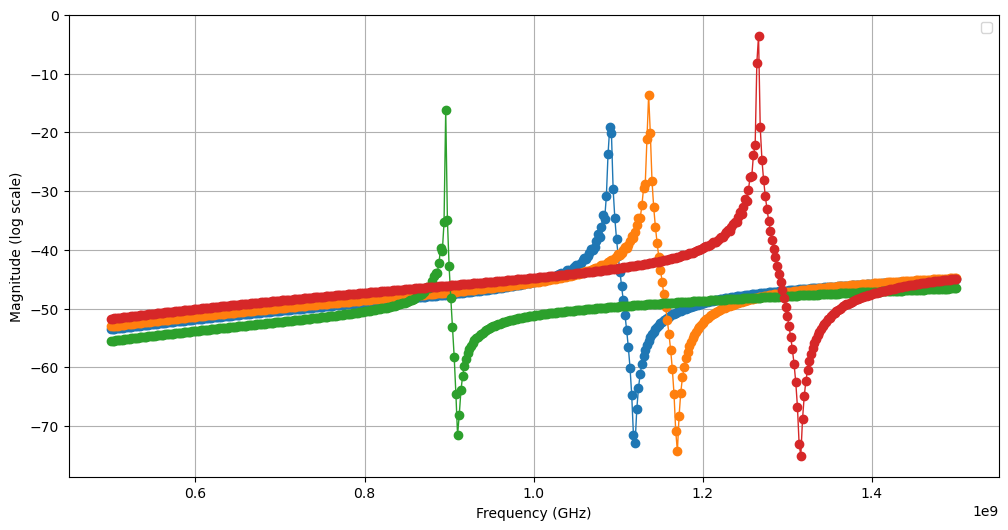

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=[12, 6])
plt.plot(freq,y11,'-o',lw=1)
plt.plot(freq,y11_1,'-o',lw=1)
plt.plot(freq,y11_2,'-o',lw=1)
plt.plot(freq,y11_3,'-o',lw=1)

plt.xlabel("Frequency (GHz)")
plt.ylabel("Magnitude (log scale)")
plt.grid("on")
plt.legend()

## input produce

In [71]:
# %load data_gene_14paras
# code by Zhengcaizhi
# %load data_gene_new
import skrf as rf
import numpy as np
from scipy.signal import argrelextrema

def YtoZS(Y_COM, freq):
    Y11 = 20*np.log10(abs(Y_COM))
    Z_COM = 1/Y_COM
    z = 50 
    S11_COM = (1-Y_COM*z)/(1+Y_COM*z)

    group_delay = -np.diff(np.unwrap(np.angle(S11_COM))) / np.diff(2 * np.pi * freq)
    group_delay = np.concatenate(([group_delay[0]], group_delay))
    Q_COM = 2*np.pi*(freq)*group_delay *abs(S11_COM)/(1-abs(S11_COM)**2)

    DSP_COM = 10*np.log10(1-abs(S11_COM)**2)
    return Y11, Z_COM.real, S11_COM.real, S11_COM.imag, Q_COM, DSP_COM

def higherex(x):
    argma = argrelextrema(x, np.greater)[0]
    argmi = argrelextrema(x, np.less)[0]
    max = np.argmax(x)
    if max != argma[-1]:
        a_ma = argma[argma>max][x[argma[argma>max]].argmax()]
        a_mi = argmi[a_ma > argmi][-1]
    else: 
        a_ma = 800
        a_mi = argmi[a_ma > argmi][-1]
        print('no extrme point after max')
        
    # print(len(argma[argma > max]) == 1 and len(argmi[argmi > max]) == 1)
    x_new = x.copy()
    x_new[a_mi+1:] = x_new[a_mi+1:] * (x[max]/x[a_ma])
    # x_new[a_mi+1:2*a_ma - a_mi] = x_new[a_mi+1:2*a_ma - a_mi] * (x[max]/x[a_ma])
    return x_new

# 根据16个参数计算Y11值
def cacul(x,y,freq,NT,Pitch):
    
    # Refl0 = x[0]
    Alpha0 = x[0]
    ReEps = x[1]
    dT = x[2]
    # SAW_Vel = x[4]
    Ksi0 = x[3]
    Ksi1 = x[4]
    Ksi2 = x[5]
    Ksi3 = x[6]
    Delta_Ksi = x[7]
    Delta_Fr_Ksi = x[8]
    Cp = x[9]
    Rs = x[10]
    Rp = x[11]
    Ls = x[12]
    M = x[13]

    Refl0 = y[0]
    SAW_Vel = y[1]
    # M = x[15]
    # M = 0.5
    # NT = 60
    NR = 20
    # Pitch = 2.6*1e-6
    W = 40*Pitch
    ii = 1j
    Eps0 = ReEps
    Freq0=SAW_Vel/(2*Pitch)
    Refl=Refl0*freq/Freq0
    Eps=Eps0*np.exp(0.71866*np.tan(1.966*(M-0.5)))
    C0=(1+Eps)*8.851*pow(10,-12)*NT*W
    Alpha=Alpha0*(1-2*(M-0.5)**2)*np.sqrt(freq/Freq0)*np.exp(0.35933*np.tan(1.966*(M-0.5)))
    Attn1=np.exp(-Ksi2*(freq-Freq0-Delta_Fr_Ksi*10**6)/Freq0)+Ksi3
    Attn=np.maximum(Ksi0+Delta_Ksi*(Freq0-freq)/Freq0+Ksi1/Attn1,0)
    AttnR=Attn
    AttnG=Attn
    Fr_C0=2*np.pi*freq*C0
    PM_alpha=np.sqrt(0.5*Alpha*NT*Fr_C0)
    PM_a=2*np.pi*NT*freq/(Freq0-dT*(freq-Freq0))-2*np.pi*NT-ii*Attn*NT
    PM_b=Refl*NT
    PM_z=np.sqrt(PM_a*PM_a-PM_b*PM_b)
    Denom=PM_z*np.cos(PM_z)+ii*PM_a*np.sin(PM_z)
    P11_T=-ii*PM_b*np.sin(PM_z)/Denom
    P12_T=PM_z/Denom
    P13_T=ii*PM_alpha*(PM_z*np.sin(PM_z)+ii*(PM_a-PM_b)*(1-np.cos(PM_z)))/(PM_z*Denom)
    P33_X=(PM_z*np.sin(PM_z)+ii*(PM_a-PM_b)*(1-np.cos(PM_z)))/(PM_z*Denom)-1
    P33_T=ii*Fr_C0*(1+Cp)+4*ii*PM_alpha**2/(PM_a+PM_b)*P33_X
    PM_aR=2*np.pi*NR*freq/(Freq0-dT*(freq-Freq0))-2*np.pi*NR-ii*AttnR*NR
    PM_bR=Refl*NR
    PM_zR=np.sqrt(PM_aR*PM_aR-PM_bR*PM_bR)
    DenomR=PM_zR*np.cos(PM_zR)+ii*PM_aR*np.sin(PM_zR)
    P11_R=-ii*PM_bR*np.sin(PM_zR)/DenomR
    PM_aG=np.pi*freq/(Freq0-dT*(freq-Freq0))-np.pi-ii*AttnG*0.5
    PM_bG=Refl*0.5
    PM_zG=np.sqrt(PM_aG*PM_aG-PM_bG*PM_bG)
    DenomG=PM_zG*np.cos(PM_zG)+ii*PM_aG*np.sin(PM_zG)
    P11_G=-ii*PM_bG*np.sin(PM_zG)/DenomG
    P12_G=-PM_zG/DenomG
    # Y_ResAcModel=P33_T-4*P11_R*P13_T*P13_T/(1-P11_R*(P11_T+P12_T))
    Mult=P11_G+P11_R*P12_G*P12_G/(1-P11_G*P11_R)
    Y5_ResAcModel=P33_T-4*Mult*P13_T*P13_T/(1-Mult*(P11_T+P12_T))
    Y_COM=(Y5_ResAcModel+1/Rp)/(1+(Y5_ResAcModel+1/Rp)*(Rs+2*ii*np.pi*freq*10**(-9)*Ls))
    # y = 20*np.log10(abs(Y_COM))
    # y = np.stack((freq,y), axis=-1)
    return Y_COM

if __name__ == '__main__':
    # names = np.genfromtxt('C:\\Users\\caizhi.zheng\\code\\For AI\\MB COM/name.csv', delimiter=',')
    MP_num = [45,50,55,60,65]
    # MP_num = [45,50]
    Pitch_num = [180,200,225,260]
    freq_star = [8.5, 7.5, 6.5, 5.5]
    # PF = [[180,8.5],[200,7.5],[225,6.5],[260,5.5]]
    PF = [[200,7.5]]
    # names = [[150,45,80],[150,50,80],[150,55,80]
    #      ,[60,45,80],[60,50,80],[60,55,80]
    #      ,[90,45,80],[90,50,80],[90,55,80]]
    # freq = np.linspace(0.7E9, 0.9E9, 801)
    # freq = np.linspace(2.2e9,2.7e9,2001)
    # freq = np.linspace(0.5E9, 3E9, 10001)
    # for j in range(3):
    for mp in MP_num:
        for pf in PF:
            NT = 60
            # Pitch = int(names[j][2])*1e-8
            Pitch = pf[0]*1e-8
            fre_0 = pf[1]
            suffix = str(int(NT)) + '-' + str(int(mp)) + '-' + str(int(pf[0])) 
            # freq = np.linspace(fre_0*1e8,(fre_0+5)*1e8,2001)
            freq = np.linspace(9*1e8,1.1*1e9,801)
            if pf[0] != 225:
                pitch = int(0.1*pf[0])
                test_path = 'C:\\Users\\caizhi.zheng\\code\\For AI\\SNP Selection/'+'LT'+str(NT)+ 'MP'+str(mp) +'P'+str(pitch) +'/'
            saw_set = rf.read_all_networks(test_path)
            for name in saw_set:
                saw = saw_set[name]
            # fre_str = str(fre_0*100) + '-' + str((fre_0+5)*100) +'MHZ'
            Y0 = saw['900-1100MHZ'].y[:,0,0]
            [Y0_Y11, Y0_Z, Y0_SR, Y0_SI, Y0_Q, Y0_D] = YtoZS(Y0, freq)
            Y0_Z = higherex(Y0_Z)
            GT = np.stack((Y0_Y11, Y0_Z, Y0_SR, Y0_SI, Y0_D), axis=-1)
                
            result = []
            # freq = np.linspace(1.5E9, 2.5E9, 4001)
            # origin_sample是原本的5000组参数
            origin_14paras = np.genfromtxt('D:/data/Data_14paras/out/MP' + str(int(mp))+ '.csv',delimiter=',')
            # x = np.genfromtxt('D:/data/Data_4paras/result'+suffix+'.csv',delimiter=',')
            y_12 = np.genfromtxt('D:/data/Data_14paras/result'+suffix+'1.csv',delimiter=',')
            print('LT60-'+str(mp)+'-'+str(pf[0]))
            for i in range(0,len(origin_14paras)):
                print(i)
                Y_COM = cacul(origin_14paras[i],y_12, freq, NT=NT, Pitch=Pitch)
                Y11 = 20*np.log10(abs(Y_COM))
                # Y_com_fre = np.stack((Y11, freq), axis = -1)
                # Y11_mag = sample(Y_com_fre)
                Z_COM = 1/Y_COM
                Z11 = 20*np.log10(abs(Z_COM.real))
                # Z_com_fre = np.stack((Z_COM.real, freq), axis=-1)
                # Z11_real = sample(Z_com_fre)
                z = 50 
                S11_COM = (1-Y_COM*z)/(1+Y_COM*z)
                DSP_COM = 10*np.log10(1-abs(S11_COM)**2)
                # S_real_fre = np.stack((S11_COM.real, freq), axis=-1)
                # S11_real = sample(S_real_fre)
                # S_imag_fre = np.stack((S11_COM.imag, freq), axis=-1)
                # S11_imag = sample(S_imag_fre)
                Z = Z_COM.real
                Z = higherex(Z)
                Inputs = np.stack((Y11, Z, S11_COM.real, S11_COM.imag, DSP_COM), axis=-1)
                dff = Inputs-GT
                result.append(dff) 
            result = np.array(result)
            # mu = result.reshape(-1,2).mean(axis = 0)
            # sigma = result.reshape(-1,2).std(axis = 0)
            mu = result.reshape(-1,5).mean(axis = 0)
            sigma = result.reshape(-1,5).std(axis = 0)
            if (sigma == 0).all() != True:
                result = (result - mu )/ sigma
            else:
                result = result - mu
            suffix = str(int(NT)) + '-' + str(int(mp)) + '-' + str(int(pf[0])) 
            # 将生成的(5000,2001,4)四维矩阵直接保存为numpy格式
            # (20000,801,5)
            file_path = 'D:\\data\\Data_14paras\\input2w/' + suffix + '.npy'
            with open(file_path,'wb') as f:
                np.save(f, result)
            file_path1 = file_path + 'musi.csv'
            with open(file_path1,'w') as f:
                np.savetxt(f,mu)   
                np.savetxt(f,sigma)
